<a href="https://colab.research.google.com/github/drishyatv/classificaton-problem/blob/main/ASSIGNMNTclassificationprbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading and Preprocessing

In [ ]:
 from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [ ]:
print(df.isnull().sum())    #Check for Missing Values


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)              # Feature Scaling
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Convert the scaled array back to a DataFrame for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Preprocessing Explanation

1.No missing values: No imputation needed.

2.StandardScaler used to bring all features to the same scale with mean = 0 and std = 1.

3.Especially necessary for distance-based models like k-NN and margin-based models like SVM.


In [ ]:

2. Classification Algorithm Implementation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#Define a function to train and evaluate models

from sklearn.metrics import accuracy_score

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    return acc


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(), "Logistic Regression")


Logistic Regression Accuracy: 0.9737


0.9736842105263158

Description: Linear model that estimates probabilities using a sigmoid function. Well-suited for binary classification tasks like this one.



In [ ]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")


Decision Tree Accuracy: 0.9474


0.9473684210526315

Description: Non-linear model that splits data based on feature values. Easy to interpret and handles non-linearities well.


In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")


Random Forest Accuracy: 0.9649


0.9649122807017544

Description: Ensemble of decision trees that reduces overfitting and improves accuracy. Robust and effective


In [ ]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC
evaluate_model(SVC(), "SVM")


SVM Accuracy: 0.9737


0.9736842105263158

Description: Finds an optimal hyperplane to separate classes. Effective in high-dimensional spaces.



In [ ]:
#k-Nearest Neighbors (k-NN)

from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(), "k-NN")


k-NN Accuracy: 0.9474


0.9473684210526315


3. Model Comparison

Logistic Regression Accuracy: 0.9737
Decision Tree Accuracy: 0.9474
Random Forest Accuracy: 0.9649
SVM Accuracy: 0.9737
k-NN Accuracy: 0.9474


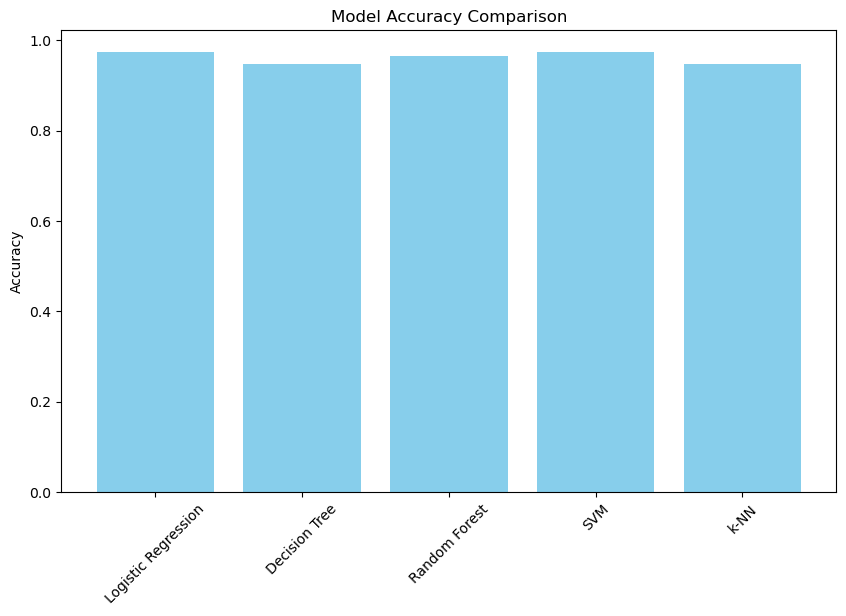

In [ ]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    acc = evaluate_model(model, name)
    results[name] = acc

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()



Best and Worst Performing Models

In [ ]:
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f"Best performing model: {best_model}")
print(f"Worst performing model: {worst_model}")


Best performing model: Logistic Regression
Worst performing model: Decision Tree
